### Exercise 1

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat



### Task 1

#### Load Matlab data into Python and plot it

a) Load the file twoClassData.mat into Python (found in
Ex1_data.zip).

The function ravel() transforms y from 400 × 1 matrix into a 400-length
array. In Python these are different things unlike Matlab.

In [2]:
mat = loadmat("Ex_1/twoClassData.mat")

print(mat.keys())
X = mat["X"] #array of ones and zerros
y = mat["y"].ravel()


dict_keys(['__header__', '__version__', '__globals__', 'y', 'X'])


b) The matrix X contains two-dimensional samples from two classes, as defined by y. Plot the data as a scatter plot

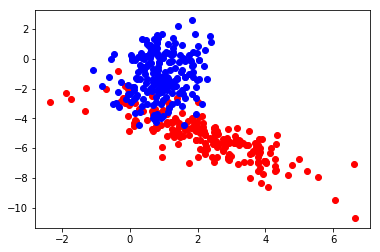

In [3]:
class1=X[y == 0, :]
class2=X[y == 1, :]
plt.plot(class1[:, 0],class1[:, 1],'ro');
plt.plot(class2[:, 0],class2[:, 1],'bo');




### Task 2
##### Remove the uneven illumination from a microscope image using least squares fitting like we did at the lecture.

Load the image into numpy array Z using the imread function of
matplotlib.image1

. Finally, show the image on screen (using
matplotlib.pyplot.imshow) and check that the image shape is 1300×1030.
Let’s next fit a 2nd order surface to the grayscales.

a) Create the explanatory variables (all x,y-coordinates in a matrix):
X, Y = np.meshgrid(range(1300), range(1030))

b) Vectorize the matrices X, Y,Z using ravel, e.g., z = Z.ravel().

c) Prepare the design matrix H like in the lectures and solve the LS coefficients c.

d) Compute the model prediction as z_pred = np.dot(H, c) and resize
the vector to the original size.

e) Subtract the model prediction from the original image and show the result
on screen.


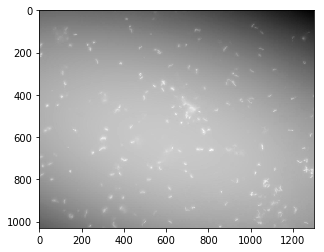

In [4]:
Z = matplotlib.pyplot.imread("Ex_1/uneven_illumination.jpg")
matplotlib.pyplot.imshow(Z, cmap="gray")

C:\Users\kumars\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


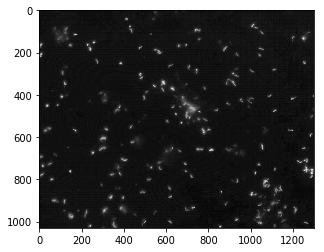

In [5]:
X, Y = np.meshgrid(range(1300), range(1030))
x = X.ravel()
y = Y.ravel()
z = Z.ravel()

H = np.column_stack((x**2,y**2,x*y,x,y,np.ones_like(x)));

c = np.linalg.lstsq(H,z)[0]; ##Ls Coeffienents C

z_pred = np.dot(H,c);
Z_pred = np.reshape(z_pred, X.shape);



S = Z - Z_pred
plt.imshow(S, cmap = 'gray')
plt.show()



### 3. Estimating sinusoidal parameters.

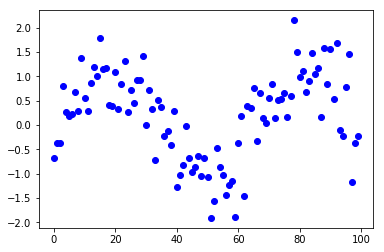

In [6]:
n = np.linspace(0,99,100);
w = np.sqrt(0.3) * np.random.randn(100);
f0 = 0.015;

x = np.sin (2*np.pi*f0*n)+w; 

plt.plot(x,'bo')

In [8]:
scores = []
frequencies = []
for f in np.linspace(0, 0.5, 1000):
# Create vector e. Assume data is in x.

    z = -2*np.pi*1j*f*n # <compute -2*pi*i*f*n. Imaginary unit is 1j>
    e = np.exp(z)
    score = np.abs(np.dot(x,e)) # <compute abs of dot product of x and e>
    scores.append(score)
    frequencies.append(f)
fHat = frequencies[np.argmax(scores)]
print(fHat)

0.015015015015015015
